*Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.*

Anomaly Detection is the process of identifying data points or patterns that deviate significantly from normal behavior. These unusual patterns may indicate errors, fraud, faults, or rare events.

Point anomalies are individual data points that are far from the rest of the data. Example: A credit card transaction of ₹5,00,000 when usual transactions are below ₹5,000.

Contextual anomalies are data points that are abnormal in a specific context such as time or location. Example: High electricity usage in winter may be normal, but the same usage in mild weather could be abnormal.

Collective anomalies occur when a group of data points together behaves abnormally, even if individual points seem normal. Example: A sudden continuous drop in network traffic over several hours indicating a system failure.

---

*Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.*

Isolation Forest is an ensemble-based method that isolates anomalies by randomly splitting data using decision trees. Anomalies are easier to isolate and require fewer splits. It works well for high-dimensional datasets and large-scale anomaly detection.

DBSCAN is a density-based clustering algorithm that groups closely packed points and marks low-density points as outliers. It is useful when clusters have irregular shapes and when spatial or geographical anomaly detection is required.

Local Outlier Factor (LOF) measures how isolated a point is compared to its local neighbors using density. Points with much lower density than neighbors are considered anomalies. It is suitable when anomalies are defined relative to local data structure.

---

*Question 3: What are the key components of a Time Series? Explain each with one example.*

Trend is the long-term movement or direction in the data. Example: Steady increase in online shopping sales over several years.

Seasonality refers to repeating patterns at fixed time intervals. Example: Ice cream sales increasing every summer.

Cyclic component represents long-term fluctuations that are not fixed in period, often linked to economic cycles. Example: Rise and fall in automobile sales due to economic boom and recession.

Irregular or residual component consists of random noise or unpredictable variations. Example: Sudden drop in sales due to an unexpected strike.

---

*Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?*

A time series is stationary when its statistical properties such as mean, variance, and autocorrelation remain constant over time.

Stationarity can be tested using visual inspection (constant mean and variance over time), rolling statistics, and statistical tests like the Augmented Dickey-Fuller (ADF) test.

To transform a non-stationary series into stationary, common methods include differencing (subtracting previous values), log or square root transformation to stabilize variance, and removing trend or seasonality using decomposition.

---

*Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.*

AR (AutoRegressive) model predicts future values using past values of the series. It is useful when the data shows correlation with its own previous values.

MA (Moving Average) model predicts using past forecast errors. It is useful when the series shows short-term shock effects.

ARIMA combines AR and MA with differencing to handle non-stationary data. It is widely used for general time series forecasting without seasonality.

SARIMA extends ARIMA by adding seasonal AR, MA, and differencing components. It is used when the data shows strong seasonal patterns, such as monthly or quarterly data.

SARIMAX is SARIMA with exogenous variables, meaning it includes external factors as predictors. It is useful when outside variables like weather or promotions influence the time series.

---

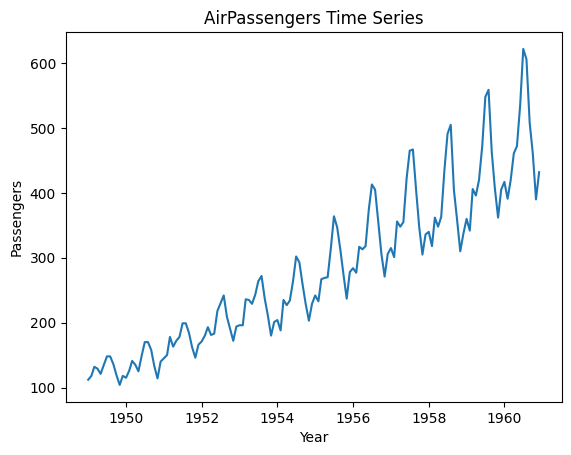

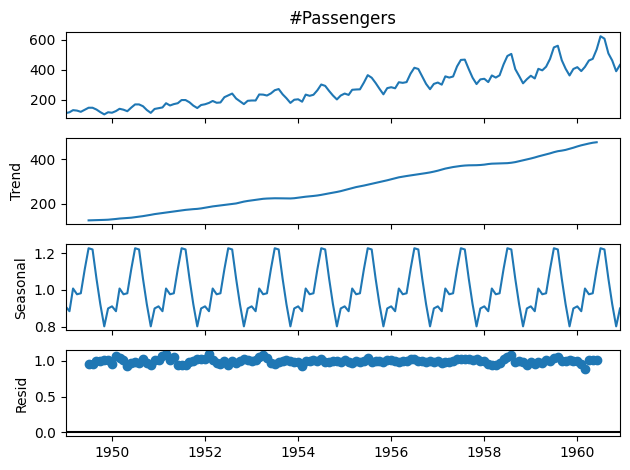

In [4]:
# Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plot original series
plt.figure()
plt.plot(df['#Passengers'])
plt.title('AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

# Decomposition
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative')
decomposition.plot()
plt.show()

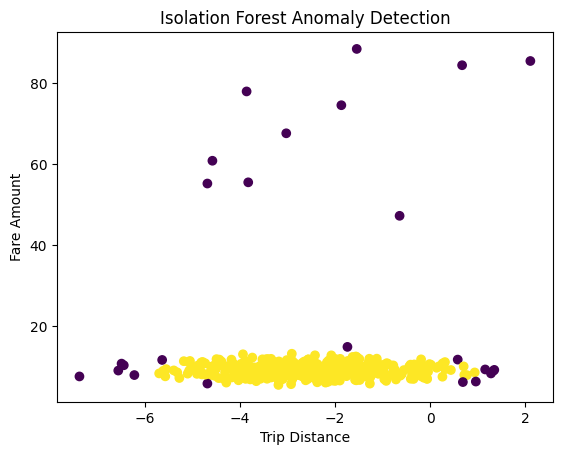

In [5]:
# Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Synthetic taxi-like dataset (distance vs fare)
X, _ = make_blobs(n_samples=500, centers=1, cluster_std=1.5, random_state=42)
df = pd.DataFrame(X, columns=['trip_distance', 'fare_amount'])

# Add some extreme outliers
df.loc[::50, 'fare_amount'] = df.loc[::50, 'fare_amount'] * 8

model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(df[['trip_distance', 'fare_amount']])

plt.figure()
plt.scatter(df['trip_distance'], df['fare_amount'], c=df['anomaly'])
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


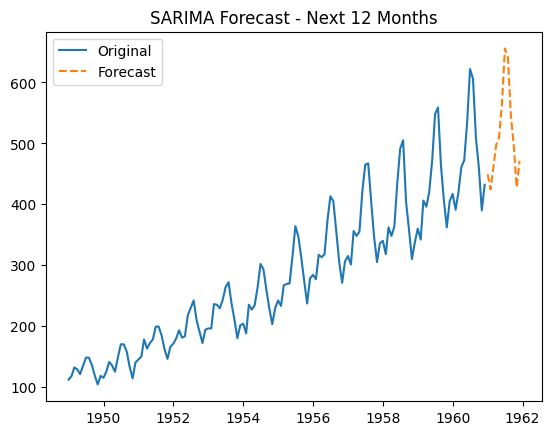

In [7]:
# Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

model = SARIMAX(df['#Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

forecast = results.forecast(steps=12)

plt.figure()
plt.plot(df['#Passengers'], label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('SARIMA Forecast - Next 12 Months')
plt.show()


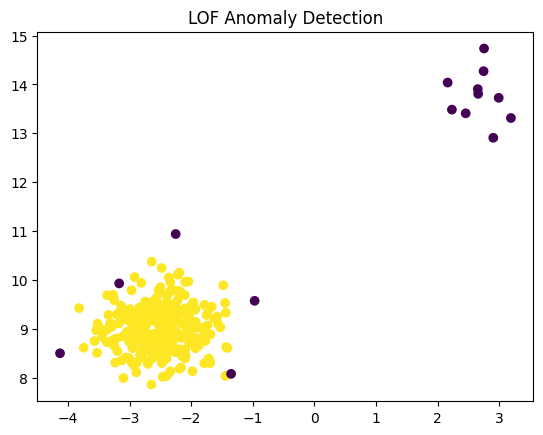

In [6]:
# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)
X[::30] = X[::30] + 5  # inject outliers

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('LOF Anomaly Detection')
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


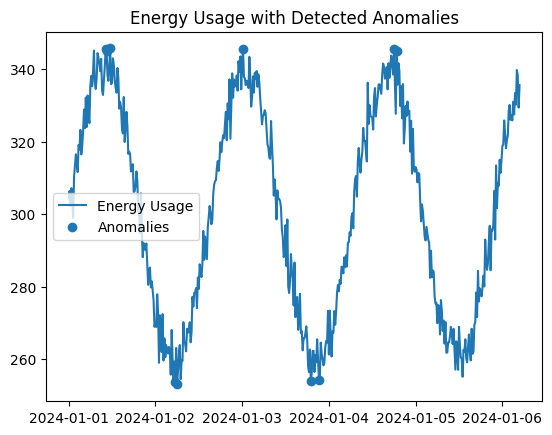

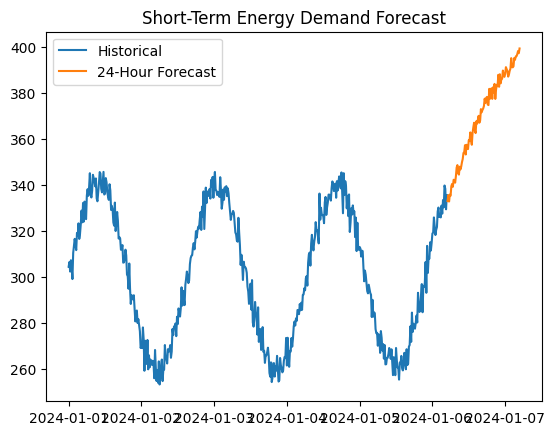

Anomaly Counts:
anomaly
 1    490
-1     10
Name: count, dtype: int64

Next 24-Hour Forecast Sample:
2024-01-06 05:00:00    332.987684
2024-01-06 05:15:00    335.531328
2024-01-06 05:30:00    332.806838
2024-01-06 05:45:00    335.791752
2024-01-06 06:00:00    335.313391
Freq: 15min, dtype: float64


In [8]:
# Question 10: You are working as a data scientist for a power grid monitoring company.
# Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes.
# The dataset includes features like timestamp, region, weather conditions, and energy usage.
# Explain your real-time data science workflow:
# ● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
# ● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
# ● How would you validate and monitor the performance over time?
# ● How would this solution help business decisions or operations?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.holtwinters import ExponentialSmoothing

rng = pd.date_range("2024-01-01", periods=500, freq="15min")
energy_usage = 300 + 40*np.sin(np.linspace(0, 20, 500)) + np.random.normal(0, 4, 500)

df = pd.DataFrame({'timestamp': rng, 'energy_usage': energy_usage})
df.set_index('timestamp', inplace=True)

iso_model = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = iso_model.fit_predict(df[['energy_usage']])

model = ExponentialSmoothing(
    df['energy_usage'],
    trend='add',
    seasonal='add',
    seasonal_periods=96
)

fit = model.fit()
forecast = fit.forecast(96)

plt.figure()
plt.plot(df['energy_usage'], label='Energy Usage')
plt.scatter(df[df['anomaly'] == -1].index,
            df[df['anomaly'] == -1]['energy_usage'],
            label='Anomalies')
plt.legend()
plt.title("Energy Usage with Detected Anomalies")
plt.show()

plt.figure()
plt.plot(df['energy_usage'], label='Historical')
plt.plot(forecast, label='24-Hour Forecast')
plt.legend()
plt.title("Short-Term Energy Demand Forecast")
plt.show()

print("Anomaly Counts:")
print(df['anomaly'].value_counts())

print("\nNext 24-Hour Forecast Sample:")
print(forecast.head())
